In [53]:
import rioxarray as rx
import rasterio 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
%matplotlib inline

In [64]:
def print_img(img, figsize = (6,8)):
    image = rx.open_rasterio(img)
    plt.figure(figsize = figsize)
    return image.plot()
    plt.title("Land Covers in this Year")
    plt.legend()

def clip(img, geometry):
    image = rx.open_rasterio(img)
    clip = image.rio.clip(geometry) 
        
def plot_clip (img, geometry, figsize = (6,8)):
    image = rx.open_rasterio(img)
    clip = image.rio.clip(geometry)
    plt.figure(figsize = figsize)
    return clip.plot()
    plt.title("Land Covers in this Year")
    plt.legend()    

In [65]:
# To see an image, use print_img function to visualize.
# For instance, this line below shows all landcovers in 1999 in the entire scale. Remove the comment to run it.
# It takes huge memory and I personally can't do it in my local environment.

#test1999 = print_img("Ecuador_Landcover_1999_v3.tif")

In [66]:
# Specify a geometry to clip your images to a smaller scale.
geometry = [
    {
        'type': 'Polygon',
        'coordinates': [[
            [-80.00, -2.256],
            [-80.00, -2.165],
            [-79.954, -2.165],
            [-79.954, -2.256],
            [-80.00, -2.256]
        ]]
    }
]

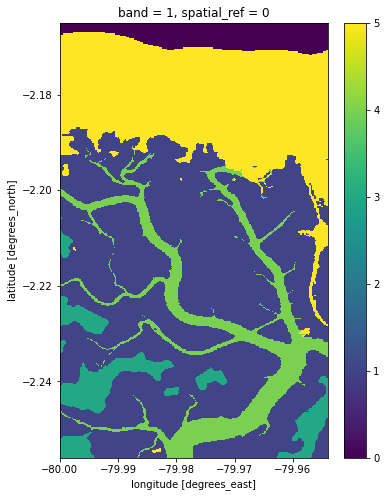

In [67]:
clip1999 = plot_clip("Ecuador_Landcover_1999_v3.tif",geometry)

In [56]:
def analysis_cate (img1, img2, img3, figsize, geometry = None, category = None):
    '''It is not full automation - I am having trouble with inserting arbitraty arguments and iterations under a class'''
    '''Now it only takes 3 images'''
    year1 = rx.open_rasterio(img1)
    year2 = rx.open_rasterio(img2)
    year3 = rx.open_rasterio(img3)
    if geometry is not None:
        year1_clip = year1.rio.clip(geometry)
        year2_clip = year2.rio.clip(geometry)
        year3_clip = year3.rio.clip(geometry)
        if category is not None:
            #year1 = rx.open_rasterio(img1)
            #year1_clip = year1.rio.clip(geometry)
            #year2 = rx.open_rasterio(img2)
            #year2_clip = year2.rio.clip(geometry)
            #year3 = rx.open_rasterio(img3)
            #year3_clip = year3.rio.clip(geometry)
            cate_clip_year1 = year1_clip.where(year1_clip == category, other = 0)
            cate_clip_year2 = year2_clip.where(year2_clip == category, other = 0)
            cate_clip_year3 = year3_clip.where(year3_clip == category, other = 0)
            cate_clip_change_01 = (cate_clip_year2 - cate_clip_year1).where((cate_clip_year2 - cate_clip_year1)==0, other = 1)
            cate_clip_change_02 = (cate_clip_year3 - cate_clip_year2).where((cate_clip_year3 - cate_clip_year2)==0, other = 1)
            cate_clip_change_all = cate_clip_change_02 + cate_clip_change_01
            plt.figure(figsize = figsize)
            return cate_clip_change_all.plot()
        change01 = (year2_clip - year1_clip).where((year2_clip - year1_clip) == 0, other = 1)
        change02 = (year3_clip - year2_clip).where((year3_clip - year2_clip) == 0, other = 1)
        change_clip_all = change01 + change02
        plt.figure(figsize = figsize)
        return change_clip_all.plot()
    if category is not None:
        cate_year1 = year1.where(year1 == category, other = 0)
        cate_year2 = year2.where(year2 == category, other = 0)
        cate_year3 = year3.where(year3 == category, other = 0)
        cate_change_01 = (cate_year2 - cate_year1).where((cate_year2 - cate_year1)==0, other = 1)
        cate_change_02 = (cate_year3 - cate_year2).where((cate_year3 - cate_year2)==0, other = 1)
        cate_change_all = cate_change_02 + cate_change_01
        plt.figure(figsize = figsize)
        return cate_change_all.plot()
    change01 = (year2 - year1).where((year2 - year1) == 0, other = 1)
    change02 = (year3 - year2).where((year3 - year2) == 0, other = 1)
    change_all = change01 + change02
    plt.figure(figsize = figsize)
    return change_all.plot()

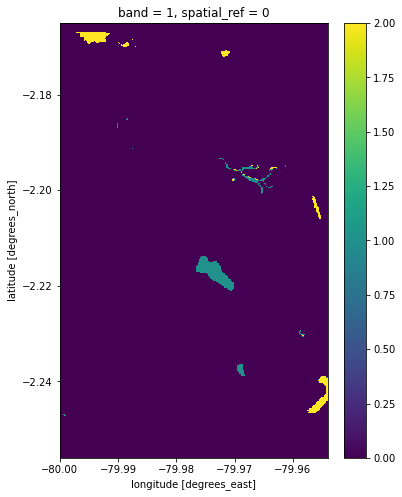

In [57]:
analysis_cate("Ecuador_Landcover_1999_v3.tif","Ecuador_Landcover_2014_v3.tif","Ecuador_Landcover_2018_v3.tif"
             ,(6,8), geometry)

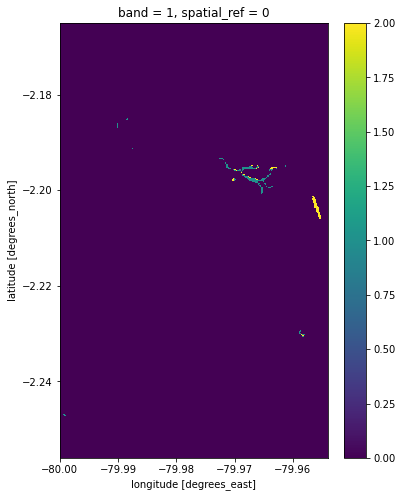

In [58]:
analysis_cate("Ecuador_Landcover_1999_v3.tif","Ecuador_Landcover_2014_v3.tif","Ecuador_Landcover_2018_v3.tif"
             ,(6,8), geometry, 4)

In [69]:
# if you want to see category 4's change in the entire scale, enter the code below:
#analysis_cate ("Ecuador_Landcover_1999_v3.tif","Ecuador_Landcover_2014_v3.tif","Ecuador_Landcover_2018_v3.tif",(6,8), None, 4)